<a href="https://colab.research.google.com/github/itissandeep98/ML-Assignments/blob/master/Assignment2/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import h5py 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
from sklearn import metrics 
from sklearn.manifold import TSNE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression

## Pre Processing

In [291]:
class MyPreProcessor():
  """
  My steps for pre-processing for the three datasets.
  """

  def __init__(self):
    pass

  def pre_process(self, dataset):
    """
    Reading the file and preprocessing the input and output.
    Note that you will encode any string value and/or remove empty entries in this function only.
    Further any pre processing steps have to be performed in this function too. 

    Parameters
    ----------

    dataset : integer with acceptable values 0, 1, or 2
    0 ->  Dataset
    1 ->  Dataset
    2 ->  Dataset

    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features)
    y : 1-dimensional numpy array of shape (n_samples,)
    """
    scaler = StandardScaler()
    if dataset == 0:
      df=h5py.File("/content/drive/My Drive/part_A_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      X = scaler.fit_transform(X)
    
    elif dataset == 1:
      df=h5py.File("/content/drive/My Drive/part_B_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])

    elif dataset == 2:
      df=pd.read_csv("/content/drive/My Drive/weight-height.csv")
      df['Gender'].replace('Male',0,inplace=True)
      df['Gender'].replace('Female',1,inplace=True)
      df['Height'],df['Weight']=df['Weight'].copy(),df['Height'].copy()
      df=df.sample(frac=1,random_state=4)
      X=df['Height'].to_numpy()
      X=np.reshape(X,(X.shape[0],1))
      X=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
      y=df['Weight'].to_numpy()
    
    return X, y

## Q1

In [348]:
def analysis(X_train, X_test, y_train, y_test):
  logistic = LogisticRegression(max_iter=10000)
  logistic.fit(X_train,y_train)
  y_pred=logistic.predict(X_test)

  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

  tsne = TSNE(n_components=2, verbose=2, n_iter=1000)
  tsne_results = tsne.fit_transform(X_train)

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    legend="full"
  )

In [345]:
def convert_n_to_1(mat):
  z=np.zeros((mat.shape[0]))
  for i in range(10):
    z[mat[:,i]==1]=i
  z=z.astype(int)
  return z

In [346]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
y=convert_n_to_1(y)
print(X.shape,y.shape)

(4200, 784) (4200,)


### d)

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)
freq = np.bincount(y_train)
items = np.nonzero(freq)[0]
print("size:",y_train.shape[0])
print(*list(zip(items,freq[items]))) 
freq = np.bincount(y_test)
items = np.nonzero(freq)[0]
print("size:",y_test.shape[0])
print(*list(zip(items,freq[items]))) 

size: 3360
(0, 320) (1, 395) (2, 314) (3, 339) (4, 333) (5, 319) (6, 353) (7, 345) (8, 328) (9, 314)
size: 840
(0, 80) (1, 99) (2, 79) (3, 85) (4, 83) (5, 79) (6, 88) (7, 86) (8, 82) (9, 79)


### e)

accuracy: 0.8869047619047619
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.021s...
[t-SNE] Computed neighbors for 3360 samples in 1.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.433503
[t-SNE] Computed conditional probabilities in 0.210s
[t-SNE] Iteration 50: error = 84.1543427, gradient norm = 0.0058794 (50 iterations in 1.639s)
[t-SNE] Iteration 100: error = 78.5645905, gradient norm = 0.0014856 (50 iterations in 1.351s)
[t-SNE] Iteration 150: error = 78.4613953, gradient norm = 0.0000714 (50 iterations in 1.203s)
[t-SNE] Iteration 200: error = 78.4609222, gradient norm = 0.0000485 (50 iterations in 1.219s)
[t-SNE] Iteration 250: error = 78.4611206, gradient norm = 0.0000435 (50 iterations in 1.208s)
[t-SNE] KL

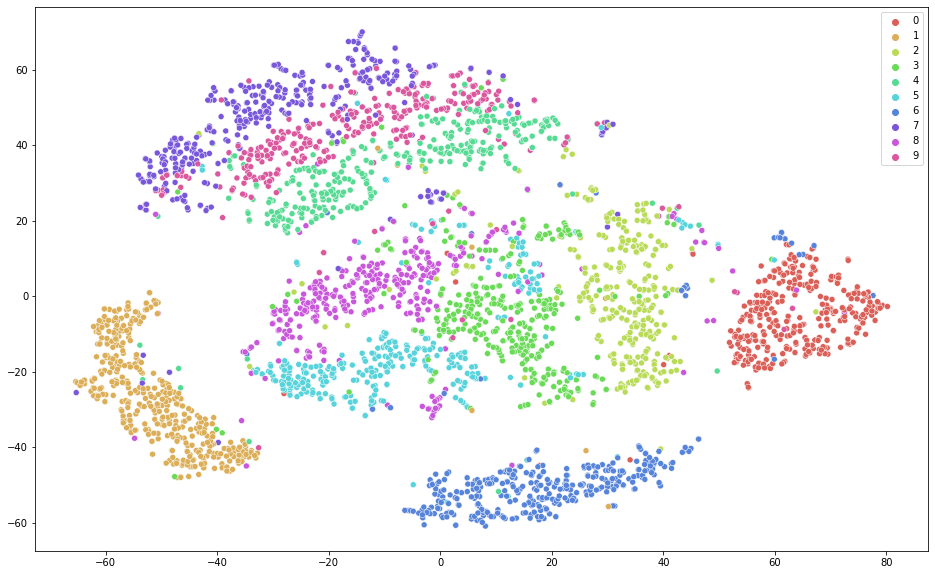

In [354]:
pca = PCA(n_components=50) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
analysis(X_train_pca, X_test_pca, y_train, y_test)

### f)

accuracy: 0.8869047619047619
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.021s...
[t-SNE] Computed neighbors for 3360 samples in 1.273s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.407791
[t-SNE] Computed conditional probabilities in 0.212s
[t-SNE] Iteration 50: error = 84.1752777, gradient norm = 0.0053380 (50 iterations in 1.886s)
[t-SNE] Iteration 100: error = 78.6708221, gradient norm = 0.0040813 (50 iterations in 1.716s)
[t-SNE] Iteration 150: error = 78.4661560, gradient norm = 0.0002476 (50 iterations in 1.364s)
[t-SNE] Iteration 200: error = 78.4616776, gradient norm = 0.0001629 (50 iterations in 1.380s)
[t-SNE] Iteration 250: error = 78.4611053, gradient norm = 0.0001061 (50 iterations in 1.389s)
[t-SNE] KL

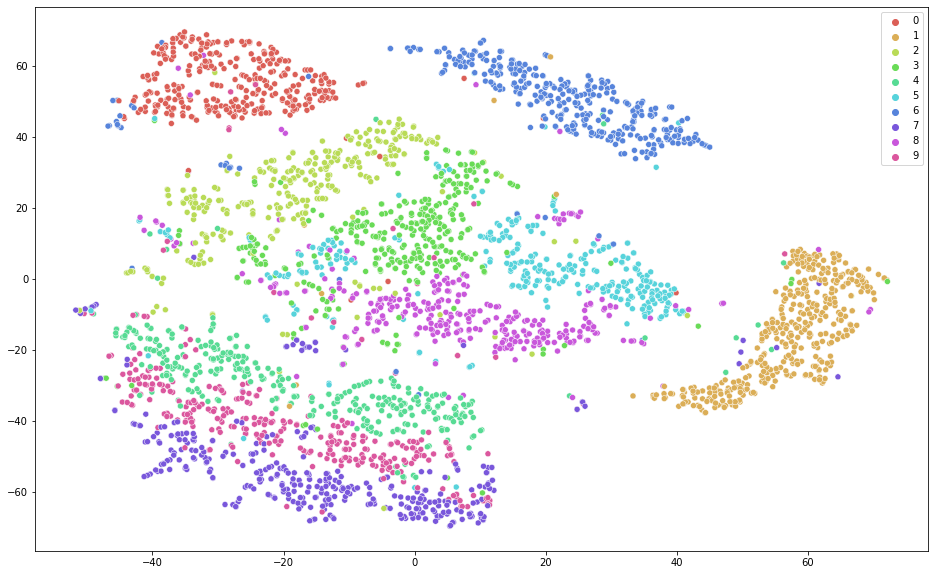

In [355]:
svd = TruncatedSVD(n_components=50)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.transform(X_test)
analysis(X_train_svd, X_test_svd, y_train, y_test)

## Q2

In [357]:
preprocessor= MyPreProcessor()
X,y=preprocessor.pre_process(2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred=linear.predict(X_test)